In [1]:
import spacy
import os
import numpy as np
import re
import altair as alt

from collections import defaultdict
from features import feature_pipeline
from utils_christina import read_corpus, text_processor

import pandas as pd
alt.renderers.enable('mimetype')
from IPython.display import Image
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

nlp = spacy.load('es_core_news_md')

In [2]:
text_dir = '/Users/eun-youngchristinapark/MDS-CAPSTONE/capstone_FHIS/corpus/'
file_list = os.listdir(text_dir)
corpus = read_corpus(text_dir)

## Density of Noun Phrase Chunks

One measure of complexity of a text is NP density, which is the mean number of modifiers per NP suggested in the paper "Coh-Metrix: Analysis of text on cohesion and language". For example, "the lovely little girl" has three modifiers and a head.
Spacy returns the minimal noun chunks, therefore, the mean number of modifiers is calculated as mean(len($NP_i$)) - 1 where $NP_i$ indicates the $i$th noun phrase. 

In [7]:
def density_noun_chunks(text, pipeline):
    ''' This function calculates the mean number of modifiers of noun phrases in the given text.
    ---------------------------------------
    Argument: text (str) - a text whose mean number of modifiers of noun phrases will be calculated.
    returns:  len_noun_chunks (float) - mean number of modifiers of noun phrases in the text
    '''
    try: 
        len_noun_chunks = 0
        pipeline.preprocess(text)
        text = pipeline.text
        pipeline.get_noun_chunks()
        noun_chunks = pipeline.noun_chunks
        if len(noun_chunks) > 0:
            len_noun_chunks = np.mean([len(noun_chunk.strip().split()) for noun_chunk in noun_chunks]) -1
        else:
            len_noun_chunks = 0
    
        return len_noun_chunks #, noun_chunks
    
    except:
        print(pipeline.text)
        print(noun_chunks)
        return 0

## Tests

We run a few tests to ensure that the density_noun_chunks return a correct value. 

### Boundary Cases

In [8]:
pipeline = feature_pipeline()
text = ''
assert density_noun_chunks(text, pipeline) == 0

In [9]:
text = '1.'
assert density_noun_chunks(text, pipeline) == 0

In [10]:
text = 'Maria'
assert density_noun_chunks(text, pipeline) == 0

In [12]:
text = 'Voy a la escuela.'
assert density_noun_chunks(text, pipeline) == 1

### Simple Cases: Brute force vs. Implementation

In [13]:
text = 'Mark está de viaje de negocios en Barcelona. Hoy tuvo un día libre y salió a visitar la ciudad.'

# compare the implementation against an alternative (brute-force) method

# brute-force method 
text = text.lower()
doc = nlp(text)
list_noun_chunks = list(doc.noun_chunks)
noun_phrase_mod = 0
for noun_chunk in list_noun_chunks:
    noun_phrase_mod += len(noun_chunk.text.strip().split()) -1 
avg_noun_phrase_mod = noun_phrase_mod / len(list_noun_chunks) 

assert np.isclose(avg_noun_phrase_mod, density_noun_chunks(text, pipeline), rtol=1e-05, atol=1e-08, equal_nan=False)

In [14]:
text = 'Me llamo María Pérez y tengo diecinueve años. Nací en Málaga, pero vivo en Granada. Soy estudiante de primer curso de Periodismo. De lunes a viernes me levanto a las siete y media, desayuno y camino hasta la universidad. Entro en clase a las nueve y salgo a la una. Al medio día, como en mi casa y veo la televisión. Por la tarde, estudio hasta las siete y después quedo con mis amigas. A nosotras nos gusta mucho el cine, el teatro y la música. Los viernes por la noche cenamos pizza y bailamos en la discoteca. Todos los sábados visito a mi familia en Málaga. El domingo por la tarde regreso a Granada y, si hace sol, salgo con mi perro a dar un paseo. ¡Me encantan los animales!'

# compare the implementation against an alternative (brute-force) method

# brute-force method 
text = text.lower()
doc = nlp(text)
list_noun_chunks = list(doc.noun_chunks)
noun_phrase_mod = 0
for noun_chunk in list_noun_chunks:
    noun_phrase_mod += len(noun_chunk.text.strip().split()) -1
avg_noun_phrase_mod = noun_phrase_mod / len(list_noun_chunks)

assert np.isclose(avg_noun_phrase_mod, density_noun_chunks(text, pipeline), rtol=1e-05, atol=1e-08, equal_nan=False)

In [15]:
text = corpus['A1'][10]['content']
text = re.sub(r"\b\d{,3}\b", "", text.strip())
text = re.sub(r"\r\n", " ", text.strip())
# compare the implementation against an alternative (brute-force) method

# brute-force method 
text = text.lower()
doc = nlp(text)
list_noun_chunks = list(doc.noun_chunks)
noun_phrase_mod = 0
for noun_chunk in list_noun_chunks:
    noun_phrase_mod += len(noun_chunk.text.strip().split()) -1
avg_noun_phrase_mod = noun_phrase_mod / len(list_noun_chunks)

assert np.isclose(avg_noun_phrase_mod, density_noun_chunks(text, pipeline), rtol=1e-05, atol=1e-08, equal_nan=False)

In [16]:
text = corpus['A2'][10]['content']
text = re.sub(r"\b\d{,3}\b", "", text.strip())
text = re.sub(r"\r\n", " ", text.strip())
# compare the implementation against an alternative (brute-force) method

# brute-force method 
text = text.lower()
doc = nlp(text)
list_noun_chunks = list(doc.noun_chunks)
noun_phrase_mod = 0
for noun_chunk in list_noun_chunks:
    noun_phrase_mod += len(noun_chunk.text.strip().split()) -1
avg_noun_phrase_mod = noun_phrase_mod / len(list_noun_chunks)

assert np.isclose(avg_noun_phrase_mod, density_noun_chunks(text, pipeline), rtol=1e-05, atol=1e-08, equal_nan=False)

In [17]:
text = corpus['B1'][10]['content']
text = re.sub(r"\b\d{,3}\b", "", text.strip())
text = re.sub(r"\r\n", " ", text.strip())
# compare the implementation against an alternative (brute-force) method

# brute-force method 
text = text.lower()
doc = nlp(text)
list_noun_chunks = list(doc.noun_chunks)
noun_phrase_mod = 0
for noun_chunk in list_noun_chunks:
    noun_phrase_mod += len(noun_chunk.text.strip().split()) -1
avg_noun_phrase_mod = noun_phrase_mod / len(list_noun_chunks)

assert np.isclose(avg_noun_phrase_mod, density_noun_chunks(text, pipeline), rtol=1e-05, atol=1e-08, equal_nan=False)

## Run through Corpora


In [18]:
level_list = ['A1', 'A2', 'B1', 'B2']
level_density_noun_phrase_fp = defaultdict(list)
for level in level_list:
    corpus_item = corpus[level]
    for i, text_item in enumerate(corpus_item):
        try: 
            level_density_noun_phrase_fp['density'].append(density_noun_chunks(text_item['content'], pipeline))    # noun phrase density
            level_density_noun_phrase_fp['level'].append(level)
            
        except:
            print(f'Error', level, i)
            pass

### Plot the distribution

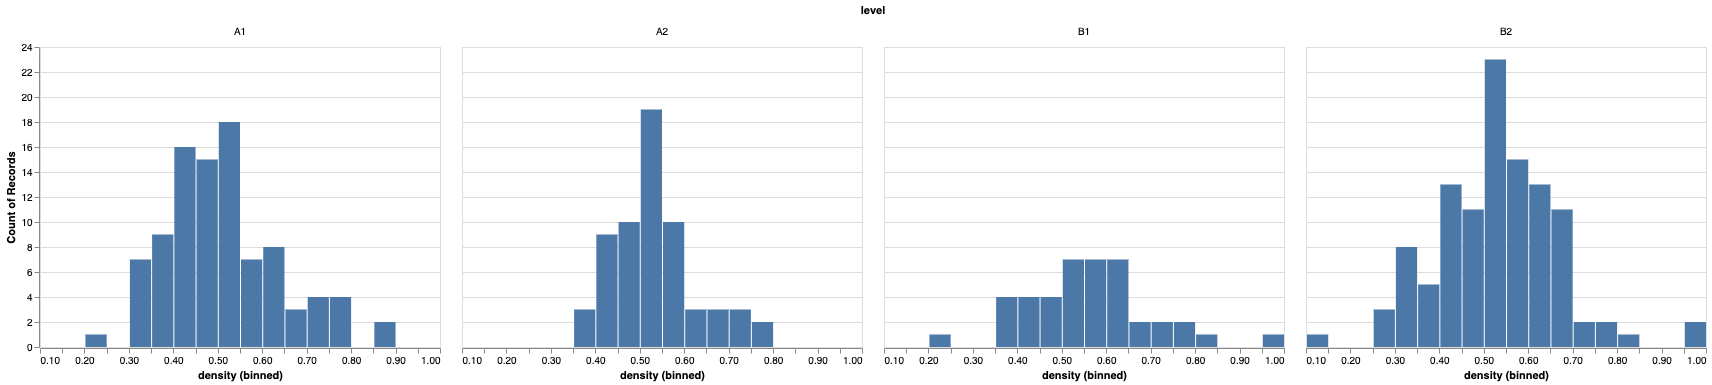

In [19]:
level_density_noun_fp_df = pd.DataFrame(level_density_noun_phrase_fp)
alt.Chart(level_density_noun_fp_df).mark_bar().encode(x = alt.X('density', bin = alt.Bin(maxbins = 30)), y = 'count()').facet('level')